In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
#configure API key
quandl.ApiConfig.api_key = '61xPY_Wx3uY7s7CsEKMk'

In [4]:
#Fed Economic Data - Natural Rate of Unemployment
data = quandl.get('FRED/NROU')

In [6]:
data.head(5)

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182


In [7]:
data.shape

(332, 1)

In [8]:
data.columns

Index(['Value'], dtype='object')

In [9]:
data_2 = data.reset_index()

In [10]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-06-01')]

In [11]:
data_sub.shape

(162, 2)

In [13]:
data_2.head(5)

,Date,Value
0,1949-01-01,5.255053
1,1949-04-01,5.261516
2,1949-07-01,5.268013
3,1949-10-01,5.274564
4,1950-01-01,5.281182


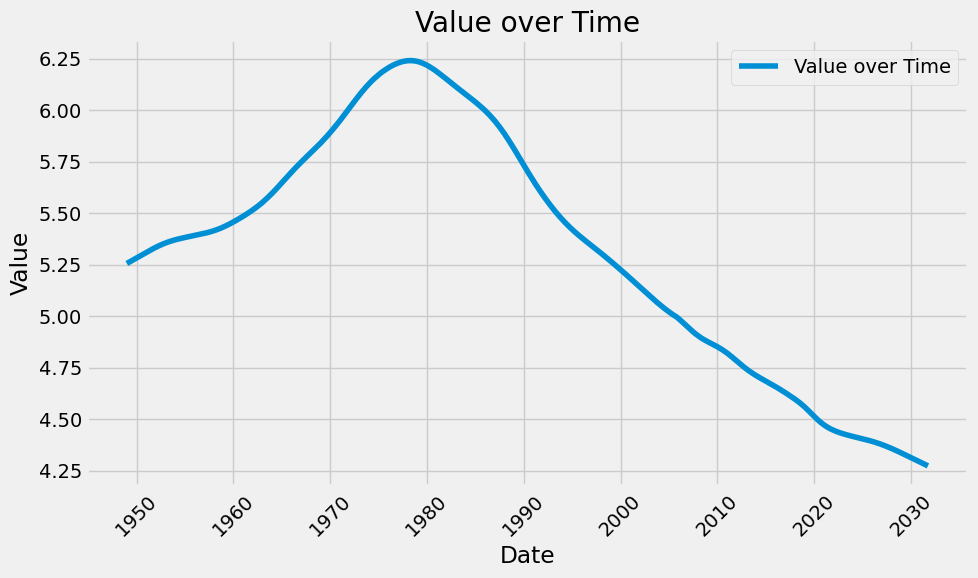

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(data_2['Date'], data_2['Value'], label='Value over Time')
plt.title('Value over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [18]:
data_sub['Date'] = pd.to_datetime(data_sub['Date'])
data_sub.set_index('Date', inplace=True)

# Now, you can safely apply the seasonal_decompose method on the 'Value' column.
decomposition = sm.tsa.seasonal_decompose(data_sub['Value'], model='additive')

In [19]:
decomposition

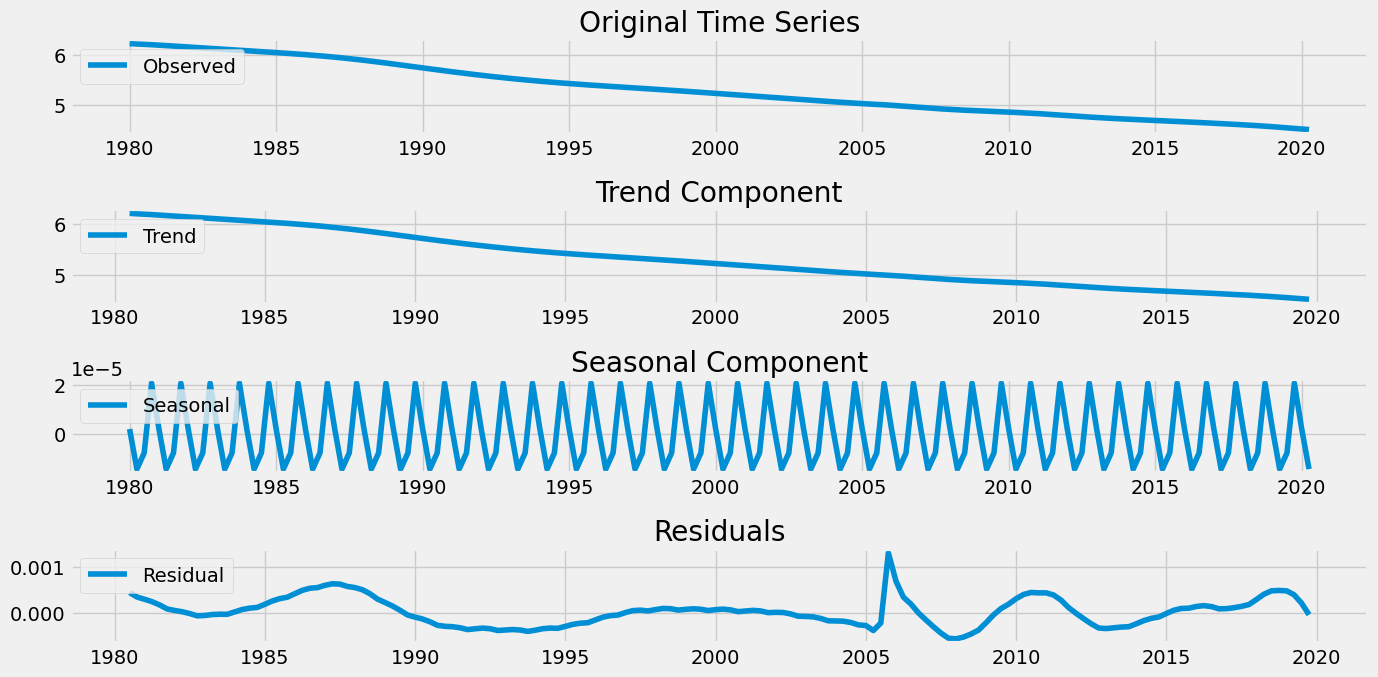

In [20]:
# Plotting the original time series
plt.figure(figsize=(14, 7))
plt.subplot(411)  # 4 rows, 1 column, 1st subplot
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.title('Original Time Series')

# Plotting the Trend component
plt.subplot(412)  # 4 rows, 1 column, 2nd subplot
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

# Plotting the Seasonal component
plt.subplot(413)  # 4 rows, 1 column, 3rd subplot
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

# Plotting the Residuals
plt.subplot(414)  # 4 rows, 1 column, 4th subplot
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residuals')

plt.tight_layout()
plt.show()